In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
#Import Data
originalData = pd.read_csv('../input/carpriceprediction/data.csv')
data = originalData.copy()

In [3]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
data.shape

(11914, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## We have a high (std) in some attributes and that's mean we have outliers, beacause that we have to solve this problem in next cells

# Solving outliers in {Engine HP , Engine Cylinders , highway MPG ,city mpg , Popularity , MSRP} (numirical attributes)

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Engine HP'}>,
        <AxesSubplot:title={'center':'Engine Cylinders'}>],
       [<AxesSubplot:title={'center':'Number of Doors'}>,
        <AxesSubplot:title={'center':'highway MPG'}>,
        <AxesSubplot:title={'center':'city mpg'}>],
       [<AxesSubplot:title={'center':'Popularity'}>,
        <AxesSubplot:title={'center':'MSRP'}>, <AxesSubplot:>]],
      dtype=object)

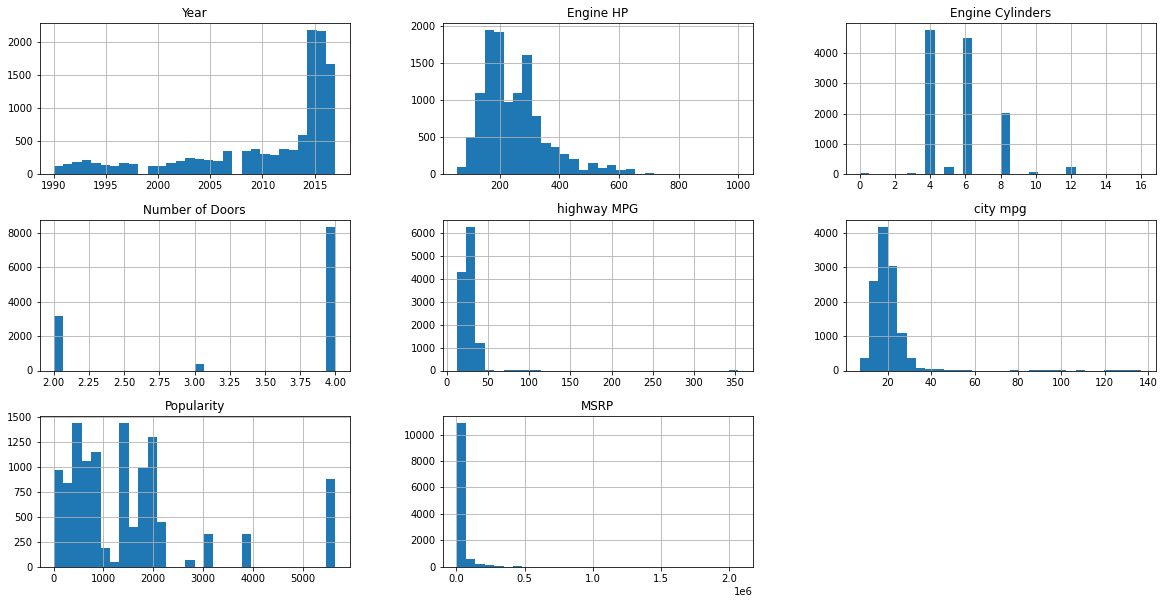

In [7]:
data.hist(bins=30, figsize=(20, 10))

**We have to drop 'Popularity' column because it has high std and it's possible make a big problem in training a model**

In [8]:
#drop 'Popularity' column
data.drop('Popularity' , axis=1 , inplace=True)
data.shape

(11914, 15)

In [9]:
#drop null value
data.dropna(subset=['Engine HP' , 'Engine Cylinders' ,'Number of Doors' ] , axis = 0, inplace=True)

* In next cells, we will check and edit each attribute
* Why did we do this? To try to get better results in training the model

In [10]:
# drop 'Engine HP' values above than 400
data.drop(data[data['Engine HP'] > 400].index,inplace=True)

In [11]:
# drop 'Engine Cylinders' values above than 8
data.drop(data[data['Engine Cylinders'] > 8].index,inplace=True)

In [12]:
# drop 'highway MPG' values above than 40
data.drop(data[data['highway MPG'] > 40].index,inplace=True)

In [13]:
# drop 'city mpg' values above than 30
data.drop(data[data['city mpg'] > 30].index,inplace=True)

In [14]:
# drop 'MSRP values above than 60000 and less than 10000 
data.drop(data[(data['MSRP'] > 60000) | (data['MSRP'] < 10000)].index,inplace=True)

In [15]:
data.shape

(8267, 15)

## plot attributes after edits

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Engine HP'}>,
        <AxesSubplot:title={'center':'Engine Cylinders'}>],
       [<AxesSubplot:title={'center':'Number of Doors'}>,
        <AxesSubplot:title={'center':'highway MPG'}>,
        <AxesSubplot:title={'center':'city mpg'}>],
       [<AxesSubplot:title={'center':'MSRP'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

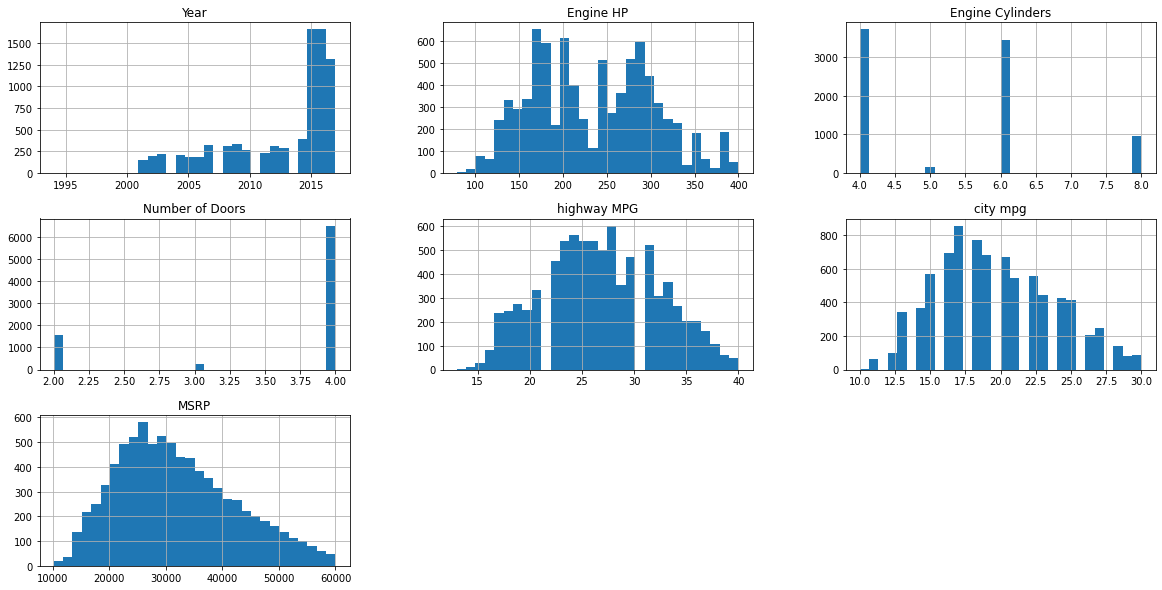

In [16]:
data.hist(bins=30, figsize=(20, 10))

In [17]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP
count,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000,8267.000000
mean,2012.558486,234.500544,5.312810,3.598887,26.804524,19.527519,31942.585823
std,4.652404,68.495572,1.344895,0.782391,5.531951,4.182888,10439.482276
min,1994.000000,79.000000,4.000000,2.000000,13.000000,10.000000,10135.000000
25%,2009.000000,178.000000,4.000000,4.000000,23.000000,16.000000,23999.500000
50%,2015.000000,231.000000,6.000000,4.000000,27.000000,19.000000,30550.000000
75%,2016.000000,285.000000,6.000000,4.000000,31.000000,22.000000,38850.000000
max,2017.000000,400.000000,8.000000,4.000000,40.000000,30.000000,60000.000000


**We have a hight (std) in {Engine HP}, but no problem, we will check it after training model if we get a bad result in training**

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8267 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8267 non-null   object 
 1   Model              8267 non-null   object 
 2   Year               8267 non-null   int64  
 3   Engine Fuel Type   8264 non-null   object 
 4   Engine HP          8267 non-null   float64
 5   Engine Cylinders   8267 non-null   float64
 6   Transmission Type  8267 non-null   object 
 7   Driven_Wheels      8267 non-null   object 
 8   Number of Doors    8267 non-null   float64
 9   Market Category    5642 non-null   object 
 10  Vehicle Size       8267 non-null   object 
 11  Vehicle Style      8267 non-null   object 
 12  highway MPG        8267 non-null   int64  
 13  city mpg           8267 non-null   int64  
 14  MSRP               8267 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 1.0+ MB


# Sort data by {Engine HP}

In [19]:
                # sort data #
data.sort_values(by='Engine HP' , ascending=True , inplace=True)

In [20]:
# reset index of rows
data.reset_index(drop=True , inplace=True)

In [21]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,Suzuki,Swift,2001,regular unleaded,79.0,4.0,AUTOMATIC,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,31,26,10949
1,Chevrolet,Metro,2001,regular unleaded,79.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,31,26,12515
2,Chevrolet,Spark,2015,regular unleaded,84.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,39,30,15095
3,Chevrolet,Spark,2015,regular unleaded,84.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,39,30,13580
4,Chevrolet,Spark,2015,regular unleaded,84.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,39,30,16535


# Get a look on the object(text) attributes 

In [22]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      2625
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
MSRP                    0
dtype: int64

In [23]:
data['Market Category'].unique()
# We have to drop this attr. because it is irregular data

array(['Hatchback', nan, 'Flex Fuel', 'Crossover,Hybrid', 'Crossover',
       'Performance', 'Luxury', 'Diesel', 'Hatchback,Luxury',
       'Crossover,Hatchback', 'Hatchback,Flex Fuel',
       'Hatchback,Luxury,Performance',
       'Hatchback,Factory Tuner,Performance', 'Factory Tuner,Performance',
       'Hybrid', 'Luxury,Performance', 'Hatchback,Performance',
       'Crossover,Luxury', 'Diesel,Luxury', 'Crossover,Luxury,Diesel',
       'Crossover,Flex Fuel', 'Flex Fuel,Hybrid', 'Flex Fuel,Performance',
       'Crossover,Hatchback,Performance', 'Exotic,High-Performance',
       'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback,Factory Tuner,Performance',
       'Flex Fuel,Luxury', 'Crossover,Flex Fuel,Luxury',
       'Crossover,Diesel', 'Crossover,Luxury,Hybrid',
       'Crossover,Luxury,Performance', 'Factory Tuner,High-Performance',
       'Luxury,High-Performance', 'High-Performance',
       'Performance,Hybrid', 'Factory Tuner,Luxury,Performance',
       'C

In [24]:
data.drop('Market Category' , axis=1 , inplace=True)

In [25]:
data['Make'].unique()
# We have to Encoding this attr. later

array(['Suzuki', 'Chevrolet', 'Mazda', 'FIAT', 'Scion', 'Toyota',
       'Pontiac', 'Nissan', 'Ford', 'Honda', 'Volkswagen', 'GMC', 'Kia',
       'Dodge', 'Hyundai', 'Plymouth', 'Buick', 'Acura', 'Oldsmobile',
       'Infiniti', 'Subaru', 'Mitsubishi', 'Chrysler', 'Volvo', 'Saab',
       'Audi', 'Land Rover', 'BMW', 'Lotus', 'Mercedes-Benz', 'Cadillac',
       'Lexus', 'Lincoln', 'Alfa Romeo', 'HUMMER', 'Porsche', 'Genesis'],
      dtype=object)

<AxesSubplot:>

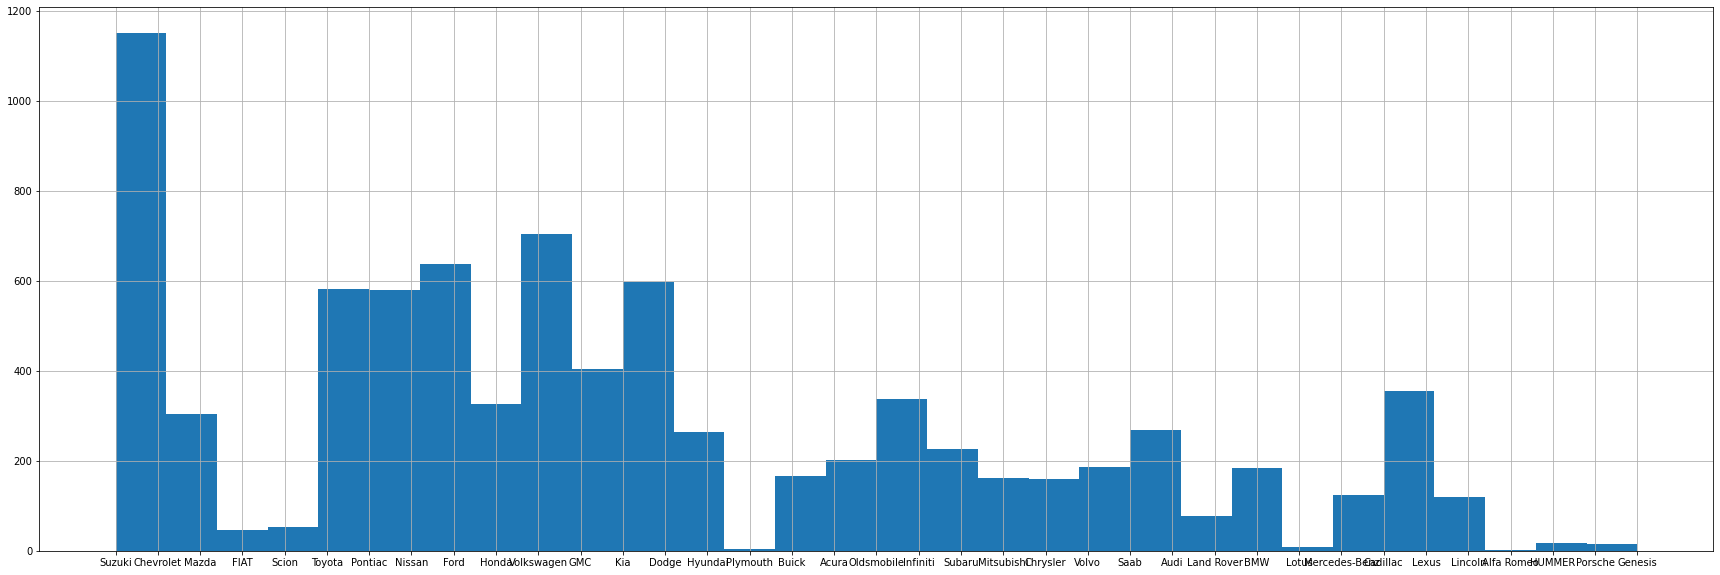

In [26]:
data['Make'].hist(bins=30, figsize=(30, 10))

In [27]:
data['Engine Fuel Type'].value_counts()

regular unleaded                                5121
premium unleaded (recommended)                  1276
premium unleaded (required)                      959
flex-fuel (unleaded/E85)                         828
diesel                                            61
flex-fuel (premium unleaded recommended/E85)      17
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

<AxesSubplot:>

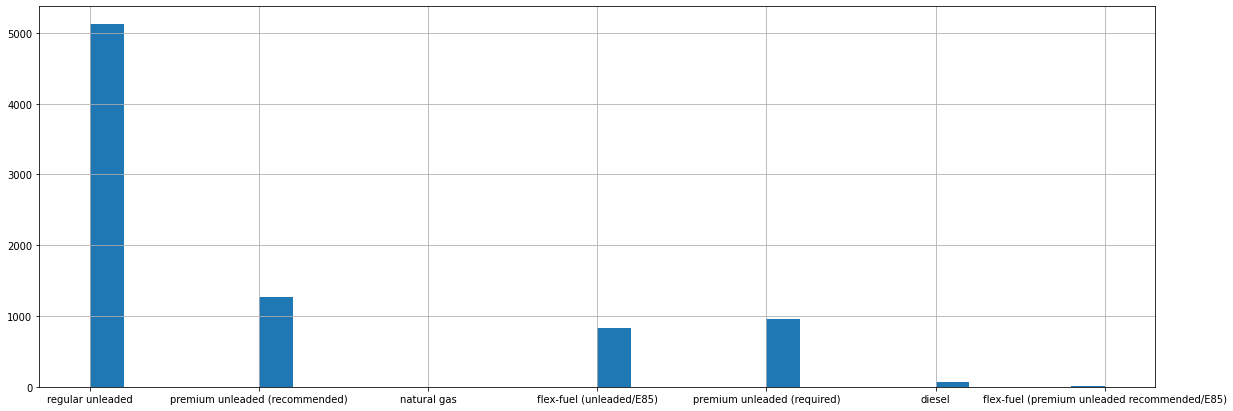

In [28]:
data['Engine Fuel Type'].hist(bins=30, figsize=(20, 7))

In [29]:
# drop some data from 'Engine Fuel Type' column
x = ['flex-fuel (premium unleaded required/E85)' , 'flex-fuel (premium unleaded recommended/E85)' 
     , 'flex-fuel (unleaded/natural gas)' , 'natural gas']
for i in x:
    data['Engine Fuel Type'].replace(i , np.nan  , inplace=True)
    
data.dropna(inplace=True)


In [30]:
data['Transmission Type'].unique()
# We have to Encoding this attr. later

array(['AUTOMATIC', 'MANUAL', 'AUTOMATED_MANUAL'], dtype=object)

<AxesSubplot:>

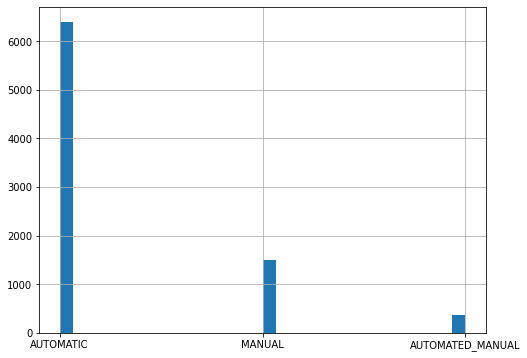

In [31]:
data['Transmission Type'].hist(bins=30, figsize=(8, 6))

In [32]:
data['Driven_Wheels'].unique()
# We have to Encoding this attr. later

array(['front wheel drive', 'rear wheel drive', 'four wheel drive',
       'all wheel drive'], dtype=object)

<AxesSubplot:>

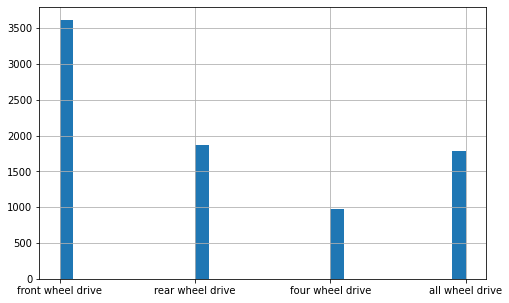

In [33]:
data['Driven_Wheels'].hist(bins=30, figsize=(8, 5))

In [34]:
data['Vehicle Size'].unique()
# We have to Encoding this attr. later

array(['Compact', 'Midsize', 'Large'], dtype=object)

<AxesSubplot:>

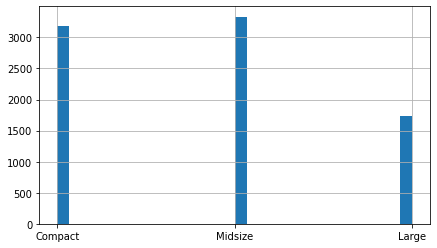

In [35]:
data['Vehicle Size'].hist(bins=30, figsize=(7, 4))

In [36]:
data['Vehicle Style'].unique()
# We have to Encoding this attr. later

array(['2dr Hatchback', 'Sedan', '4dr Hatchback', 'Convertible', 'Coupe',
       'Regular Cab Pickup', 'Extended Cab Pickup', 'Wagon',
       'Convertible SUV', '4dr SUV', 'Cargo Minivan', 'Passenger Minivan',
       'Crew Cab Pickup', '2dr SUV', 'Cargo Van', 'Passenger Van'],
      dtype=object)

<AxesSubplot:>

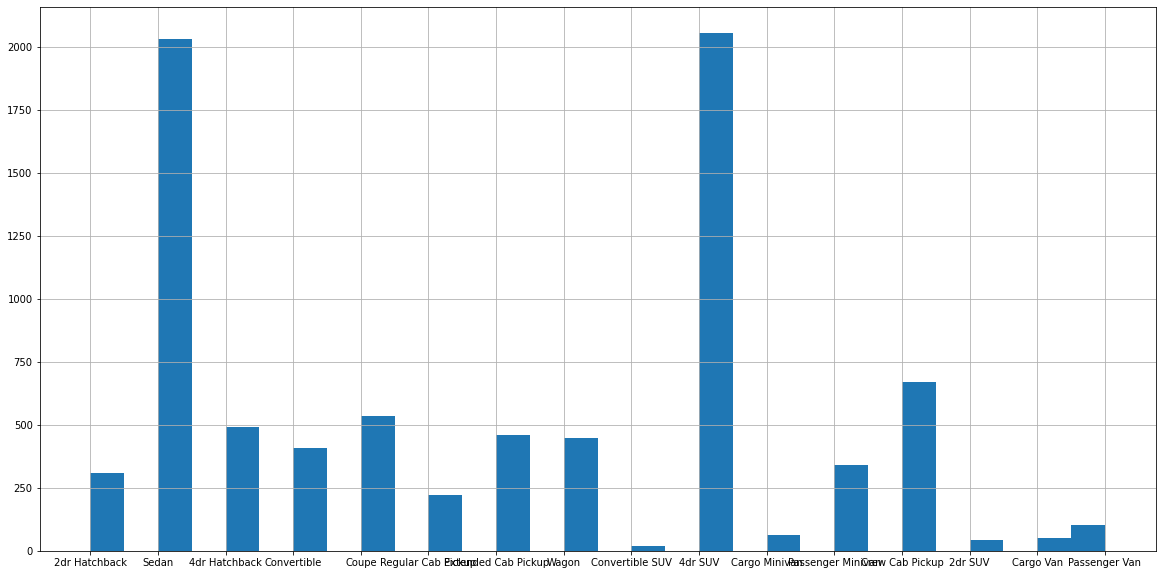

In [37]:
data['Vehicle Style'].hist(bins=30, figsize=(20, 10))

In [38]:
data['Model'].unique()
# This attr. maybe will deleted after training a model if it has nagative effect
# We have to Encoding this attr. later

array(['Swift', 'Metro', 'Spark', '2', '500', 'Protege', 'xA', 'Yaris',
       'Yaris iA', 'G3', 'Aveo', 'ECHO', 'Versa Note', 'Versa', 'Escort',
       'Jetta', 'Cabrio', 'B-Series', 'Fiesta', 'Sonoma', 'S-10', 'Cube',
       'Esteem', 'Sentra', 'Sephia', 'Prizm', '626', 'Reno', 'Forenza',
       'Vibe', 'Vitara', 'Tracker', 'xD', 'Soul', 'Protege5', 'Fit',
       'City Express', 'NV200', 'Neon', 'Corolla', 'Matrix', 'Veloster',
       'Tribute Hybrid', 'Truck', 'Accent', 'Corolla iM', 'iM', 'Sonic',
       'Rio', 'Trax', 'Encore', 'MR2 Spyder', 'Elantra Touring', 'Cruze',
       'Cruze Limited', 'Spectra', 'Tiburon', 'Sunfire', 'Integra',
       'Jetta SportWagen', 'Classic', 'Celica', 'Alero', 'Grand Am',
       'Cavalier', 'HR-V', 'Stratus', 'Ranger', 'B-Series Truck', 'Civic',
       'G20', 'Elantra', 'Malibu Classic', 'Elantra Coupe', 'Forte',
       'CX-3', 'SX4', 'XV Crosstrek', 'Lancer', 'Lancer Sportback', 'G5',
       'Crosstrek', 'Outlander Sport', 'Impreza', 'Cobalt',
    

In [39]:
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
MSRP                 0
dtype: int64

In [40]:
data.shape

(8245, 14)

In [41]:
# reset index of rows
data.reset_index(drop=True , inplace=True)

# Make a pair-plots to look to the all attributes

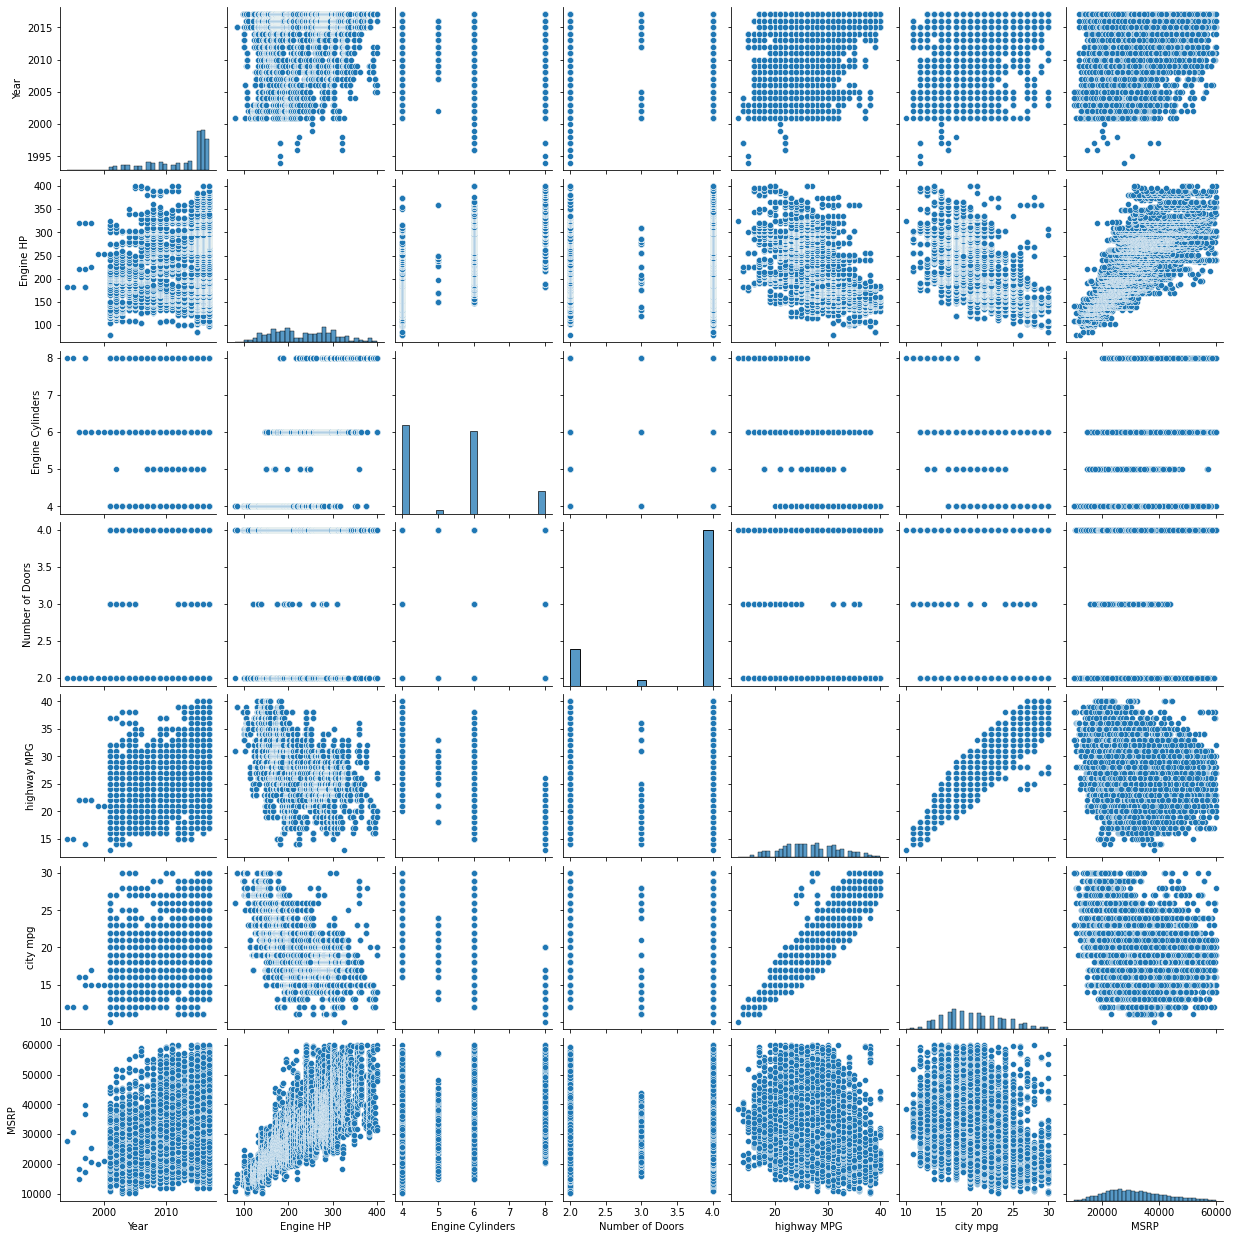

In [42]:
sns.pairplot(data)

**linear realation between {Engine HP} and {MSRP}** 


<AxesSubplot:xlabel='Engine HP', ylabel='MSRP'>

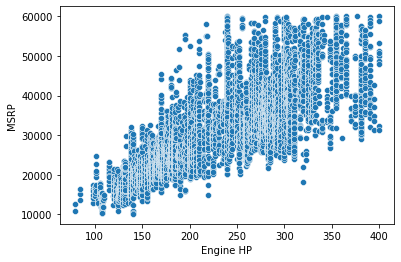

In [43]:
sns.scatterplot(data=data , x='Engine HP' , y='MSRP')

# Split data to (Train,Test) sets (Normal split)

In [44]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [45]:
# new attr. that indicate the catigory of MSRP
train_set['MSRP cat'] = pd.cut(data['MSRP'] , bins=[10000 , 20000 ,30000 , 40000 , 50000 , np.inf ] , labels=[1,2,3,4,5])

In [46]:
train_set['MSRP cat'].value_counts()/len(train_set)

2    0.367192
3    0.297756
4    0.155549
1    0.115676
5    0.063827
Name: MSRP cat, dtype: float64

<AxesSubplot:xlabel='MSRP cat', ylabel='Count'>

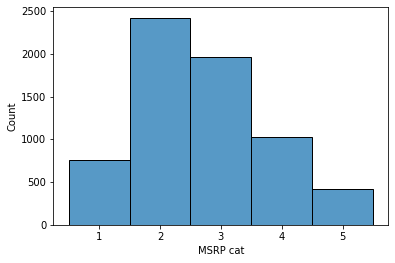

In [47]:
sns.histplot(train_set['MSRP cat'])

# Try Stratified Split (we will continue with this sets)

In [48]:
df = data.copy()

In [49]:
df.shape

(8245, 14)

In [50]:
# new attr. that indicate the catigory of MSRP
df['MSRP cat'] = pd.cut(df['MSRP'] , bins=[10000 , 20000 ,30000 , 40000 , 50000 , np.inf ] , labels=[1,2,3,4,5])

<AxesSubplot:xlabel='MSRP cat', ylabel='Count'>

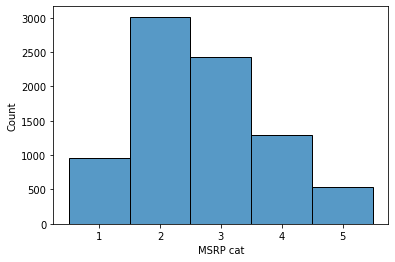

In [51]:
sns.histplot(df['MSRP cat'])

In [52]:
# Split data to tow set (Train and test)
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["MSRP cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [53]:
df['MSRP cat'].value_counts()/len(df)

2    0.365797
3    0.294603
4    0.157550
1    0.116677
5    0.065373
Name: MSRP cat, dtype: float64

In [54]:
strat_train_set['MSRP cat'].value_counts()/len(strat_train_set)

2    0.365828
3    0.294572
4    0.157520
1    0.116737
5    0.065343
Name: MSRP cat, dtype: float64

In [55]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("MSRP cat", axis=1, inplace=True)

In [56]:
strat_train_set.shape

(6596, 14)

In [57]:
strat_test_set.shape

(1649, 14)

# Feature Engineering : Making new attributes (in Training set only) 

In [58]:
# get a copy from training set
train_copy = strat_train_set.copy()

In [59]:
corr_matrix = train_copy.corr()
corr_matrix

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP
Year,1.000000,0.234786,-0.174960,0.153123,0.354184,0.334902,0.317100
Engine HP,0.234786,1.000000,0.738254,0.050941,-0.537431,-0.611529,0.765881
Engine Cylinders,-0.174960,0.738254,1.000000,0.050852,-0.746821,-0.780446,0.460802
Number of Doors,0.153123,0.050941,0.050852,1.000000,-0.017062,0.000156,0.070016
highway MPG,0.354184,-0.537431,-0.746821,-0.017062,1.000000,0.938730,-0.292013
city mpg,0.334902,-0.611529,-0.780446,0.000156,0.938730,1.000000,-0.351166
MSRP,0.317100,0.765881,0.460802,0.070016,-0.292013,-0.351166,1.000000


In [60]:
corr_matrix["MSRP"].sort_values(ascending=False)  # with the target 

MSRP                1.000000
Engine HP           0.765881
Engine Cylinders    0.460802
Year                0.317100
Number of Doors     0.070016
highway MPG        -0.292013
city mpg           -0.351166
Name: MSRP, dtype: float64

In [61]:
# Making new features
train_copy['MSRP_per_HP'] = train_copy['MSRP'] / train_copy['Engine HP']   #1
train_copy['MSRP_per_Cylinder'] = train_copy['MSRP'] / train_copy['Engine Cylinders']  #2
train_copy['MSRP_per_City_mpg'] = train_copy['MSRP'] / train_copy['city mpg']    #3

In [62]:
train_copy.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP,MSRP_per_HP,MSRP_per_Cylinder,MSRP_per_City_mpg
6797,Lincoln,Aviator,2004,premium unleaded (required),302.0,8.0,AUTOMATIC,rear wheel drive,4.0,Midsize,4dr SUV,17,12,42755,141.572848,5344.375000,3562.916667
3655,Toyota,Camry Solara,2007,regular unleaded,210.0,6.0,AUTOMATIC,front wheel drive,2.0,Midsize,Coupe,27,18,24530,116.809524,4088.333333,1362.777778
2785,Chevrolet,Silverado 1500 Classic,2007,regular unleaded,195.0,6.0,AUTOMATIC,rear wheel drive,4.0,Large,Extended Cab Pickup,20,14,21465,110.076923,3577.500000,1533.214286
3577,Ford,Explorer Sport Trac,2008,regular unleaded,210.0,6.0,AUTOMATIC,all wheel drive,4.0,Compact,Crew Cab Pickup,19,13,30015,142.928571,5002.500000,2308.846154
7371,Cadillac,CTS,2015,flex-fuel (unleaded/E85),321.0,6.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,29,18,52970,165.015576,8828.333333,2942.777778


In [63]:
# Making correlation matrix again
corr_matrix = train_copy.corr()
corr_matrix

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP,MSRP_per_HP,MSRP_per_Cylinder,MSRP_per_City_mpg
Year,1.000000,0.234786,-0.174960,0.153123,0.354184,0.334902,0.317100,0.211089,0.465958,0.083748
Engine HP,0.234786,1.000000,0.738254,0.050941,-0.537431,-0.611529,0.765881,-0.166402,0.240171,0.837348
Engine Cylinders,-0.174960,0.738254,1.000000,0.050852,-0.746821,-0.780446,0.460802,-0.279126,-0.291243,0.740908
Number of Doors,0.153123,0.050941,0.050852,1.000000,-0.017062,0.000156,0.070016,0.027101,0.018855,0.070298
highway MPG,0.354184,-0.537431,-0.746821,-0.017062,1.000000,0.938730,-0.292013,0.273660,0.243163,-0.652881
city mpg,0.334902,-0.611529,-0.780446,0.000156,0.938730,1.000000,-0.351166,0.292623,0.208606,-0.712715
MSRP,0.317100,0.765881,0.460802,0.070016,-0.292013,-0.351166,1.000000,0.484163,0.689375,0.873926
MSRP_per_HP,0.211089,-0.166402,-0.279126,0.027101,0.273660,0.292623,0.484163,1.000000,0.734327,0.197663
MSRP_per_Cylinder,0.465958,0.240171,-0.291243,0.018855,0.243163,0.208606,0.689375,0.734327,1.000000,0.341861
MSRP_per_City_mpg,0.083748,0.837348,0.740908,0.070298,-0.652881,-0.712715,0.873926,0.197663,0.341861,1.000000


In [64]:
corr_matrix["MSRP"].sort_values(ascending=False)   #with the target 

MSRP                 1.000000
MSRP_per_City_mpg    0.873926
Engine HP            0.765881
MSRP_per_Cylinder    0.689375
MSRP_per_HP          0.484163
Engine Cylinders     0.460802
Year                 0.317100
Number of Doors      0.070016
highway MPG         -0.292013
city mpg            -0.351166
Name: MSRP, dtype: float64

# Encoding object (text) Attributes

In [65]:
# Separate the predictors and the labels

train_predict = train_copy.drop('MSRP' , axis=1)
train_label = train_copy['MSRP'].copy()

 **Encoding & Scaling (by pipline)**

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

num_attribs = ['Year','Engine HP','Engine Cylinders','Number of Doors', 'highway MPG','city mpg','MSRP_per_HP','MSRP_per_Cylinder','MSRP_per_City_mpg']
cat_attribs = ['Make','Model','Engine Fuel Type','Transmission Type','Vehicle Size', 'Vehicle Style' , 'Driven_Wheels']

full_pipeline = ColumnTransformer([
        ("num",StandardScaler() , num_attribs),  #Scaling num. attr.
        ("cat", OrdinalEncoder(), cat_attribs),  #Encoding obj. attr.
    ])

train_predict = full_pipeline.fit_transform(train_predict)

In [67]:
train_predict.shape

(6596, 16)

# Select and Train Models

## Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_predict, train_label)  #training 

LinearRegression()

In [69]:
train_predict.shape

(6596, 16)

In [70]:
# let's try on a few training instances
some_data = train_predict[:5]
some_labels = train_label[:5]

In [71]:
print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [45264.96234938 23577.80780527 20614.06271536 30564.0317798
 50670.3070026 ]
Labels: [42755, 24530, 21465, 30015, 52970]


In [72]:
# Let’s measure this regression model’s RMSE on the whole training set
from sklearn.metrics import mean_squared_error

train_predictions = lin_reg.predict(train_predict)
lin_rmse = mean_squared_error(train_label, train_predictions, squared=False)
lin_rmse

1310.4913119921491

## Decision Tree Regression

In [73]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_predict, train_label)

DecisionTreeRegressor()

In [74]:
train_predictions = tree_reg.predict(train_predict)
tree_mse = mean_squared_error(train_label, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

**Decision Tree Regression Using Cross-Validation**

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, train_predict, train_label,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([280.07728912, 903.62843245, 389.15817264, 462.97593039,
       287.07596397, 526.56870109, 467.30409461, 360.50863579,
       395.98511453, 392.59764837])

In [76]:
tree_rmse_scores.min()

280.0772891163935

In [77]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Scores: [280.07728912 903.62843245 389.15817264 462.97593039 287.07596397
 526.56870109 467.30409461 360.50863579 395.98511453 392.59764837]
Mean: 446.58799829672097
Standard deviation: 168.9183083211485


## Random Forest Regression

In [78]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_predict, train_label)            #fit
car_predictions = forest_reg.predict(train_predict)   #predict
forest_mse = mean_squared_error(train_label, car_predictions)  #calculate error
forest_rmse = np.sqrt(forest_mse)
forest_rmse

113.4137021620353

**Random Forest Regression Using Cross-Validation**

In [79]:
forest_scores = cross_val_score(forest_reg, train_predict, train_label,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [282.75427569 400.69472719 209.24055858 399.16385966 278.5235798
 275.22151029 256.66671196 220.77461386 408.83637056 331.61726287]
Mean: 306.34934704608673
Standard deviation: 70.83720843517195


## Random Forest Regression model give the best score

## Try model on test set

In [80]:
# set new features on test set
test_copy = strat_test_set.copy()    #copy from test set 

test_copy['MSRP_per_HP'] = test_copy['MSRP'] / test_copy['Engine HP']               #1
test_copy['MSRP_per_Cylinder'] = test_copy['MSRP'] / test_copy['Engine Cylinders']  #2
test_copy['MSRP_per_City_mpg'] = test_copy['MSRP'] / test_copy['city mpg']          #3

In [81]:
final_model = forest_reg

test_predict = test_copy.drop("MSRP", axis=1)
test_label = test_copy["MSRP"].copy()

test_predict_prepared = full_pipeline.fit_transform(test_predict)   #Encoding & Scaling attr.
final_predictions = final_model.predict(test_predict_prepared)

final_mse = mean_squared_error(test_label, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

325.94342501236804

In [82]:
#try some instances from test set
array = np.array([final_model.predict(test_predict_prepared[:10]) , test_label[:10]] )

X = pd.DataFrame(array  , index=['Predections' , 'Labels'])
X.columns = [''] * len(X.columns)
X

,,,,,,,,,,
Predections,23275.26,16851.75,27137.35,30148.2,31129.65,24975.67,31470.1,15801.85,24689.45,27692.34
Labels,23380.00,16930.00,27450.00,30230.0,31395.00,25100.00,31510.0,15895.00,24830.00,27900.00


In [83]:
# Accuracy percentage on Test set
final_model.score(test_predict_prepared ,test_label )

0.9990285269837448

## Accuracy (on test set) = 0.999028